In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('D:\\CV DA Assignment\\Project Presentation\\Google play store\\Google-Playstore.csv')

In [3]:
dataset.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
dataset.shape

(2312944, 24)

In [5]:
dataset.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
df=dataset.copy()

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
## Column Rename 

for col in df.columns:
    col1 = col.replace(' ','_')
    df = df.rename(columns={col:col1})
df.columns

Index(['App_Name', 'App_Id', 'Category', 'Rating', 'Rating_Count', 'Installs',
       'Minimum_Installs', 'Maximum_Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum_Android', 'Developer_Id', 'Developer_Website',
       'Developer_Email', 'Released', 'Last_Updated', 'Content_Rating',
       'Privacy_Policy', 'Ad_Supported', 'In_App_Purchases', 'Editors_Choice',
       'Scraped_Time'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App_Name           object 
 1   App_Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating_Count       float64
 5   Installs           object 
 6   Minimum_Installs   float64
 7   Maximum_Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum_Android    object 
 13  Developer_Id       object 
 14  Developer_Website  object 
 15  Developer_Email    object 
 16  Released           object 
 17  Last_Updated       object 
 18  Content_Rating     object 
 19  Privacy_Policy     object 
 20  Ad_Supported       bool   
 21  In_App_Purchases   bool   
 22  Editors_Choice     bool   
 23  Scraped_Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

# Exploratory Data Analysis 

## Handling Missing values

In [11]:
df.isnull().sum()

App_Name                  2
App_Id                    0
Category                  0
Rating                22883
Rating_Count          22883
Installs                107
Minimum_Installs        107
Maximum_Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum_Android        6530
Developer_Id             33
Developer_Website    760835
Developer_Email          31
Released              71053
Last_Updated              0
Content_Rating            0
Privacy_Policy       420953
Ad_Supported              0
In_App_Purchases          0
Editors_Choice            0
Scraped_Time              0
dtype: int64

In [12]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for features in feature_na:
    print("The {} have {} % of missing values.".format(features,np.round(df[features].isnull().mean(),4)))

The App_Name have 0.0 % of missing values.
The Rating have 0.0099 % of missing values.
The Rating_Count have 0.0099 % of missing values.
The Installs have 0.0 % of missing values.
The Minimum_Installs have 0.0 % of missing values.
The Currency have 0.0001 % of missing values.
The Size have 0.0001 % of missing values.
The Minimum_Android have 0.0028 % of missing values.
The Developer_Id have 0.0 % of missing values.
The Developer_Website have 0.3289 % of missing values.
The Developer_Email have 0.0 % of missing values.
The Released have 0.0307 % of missing values.
The Privacy_Policy have 0.182 % of missing values.


In [13]:
missing_info = (len(df[df.isnull().any(axis=1)]) / len(df) )*100
print("Number of rows having null values in the dataset:",len(df[df.isnull().any(axis=1)]),' which is ' ,round(missing_info,2), '%')

Number of rows having null values in the dataset: 1025753  which is  44.35 %


###### Dropping Unnecessary Features 

In [14]:
## Dropping of unnecessary columns

print ("Dropping the following columns - App_Id, Developer_Website, Developer_Email, Privacy_Policy, Currency,Installs, Developer_Id, Scraped_Time,Maximum_Installs which are not needed for the analysis purposes.")

df.drop(['App_Id','Developer_Website','Developer_Email','Privacy_Policy','Currency','Developer_Id','Installs','Scraped_Time','Maximum_Installs'],axis=1,inplace=True)


Dropping the following columns - App_Id, Developer_Website, Developer_Email, Privacy_Policy, Currency,Installs, Developer_Id, Scraped_Time,Maximum_Installs which are not needed for the analysis purposes.


In [16]:
df.shape
print("Now, we have {} no. of columns".format(df.shape[1]))

Now, we have 15 no. of columns


In [17]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for features in feature_na:
    print("The {} have {} % of missing values.".format(features,np.round(df[features].isnull().mean(),4)))

The App_Name have 0.0 % of missing values.
The Rating have 0.0099 % of missing values.
The Rating_Count have 0.0099 % of missing values.
The Minimum_Installs have 0.0 % of missing values.
The Size have 0.0001 % of missing values.
The Minimum_Android have 0.0028 % of missing values.
The Released have 0.0307 % of missing values.


In [18]:
## Missing values % calculation

missing_info = (len(df[df.isnull().any(axis=1)]) / len(df) )*100
print("Number of rows having null values in the dataset:",len(df[df.isnull().any(axis=1)]),' which is ' ,round(missing_info,2) , '%')

Number of rows having null values in the dataset: 77615  which is  3.36 %


Since we have 3.08% of null values in dataset we can drop those NAN values 

In [19]:
df=df.dropna()

In [20]:
df.shape

(2235329, 15)

In [21]:
## Rename Minimum_installs as No.of. Installs
df.rename(columns = {'Minimum_Installs':'Installs'}, inplace = True)

In [22]:
## Tableau data
df.to_csv('D:\\CV DA Assignment\\Project Presentation\\Google play store\\Play_store_WON.csv')

In [25]:
## converting datatype into Integer 

convert_dt = {'Installs': 'int64', 'Rating':'int64','Rating_Count':'object'}
 
df = df.astype(convert_dt)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235329 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App_Name          object 
 1   Category          object 
 2   Rating            int64  
 3   Rating_Count      object 
 4   Installs          int64  
 5   Free              bool   
 6   Price             float64
 7   Size              object 
 8   Minimum_Android   object 
 9   Released          object 
 10  Last_Updated      object 
 11  Content_Rating    object 
 12  Ad_Supported      bool   
 13  In_App_Purchases  bool   
 14  Editors_Choice    bool   
dtypes: bool(4), float64(1), int64(2), object(8)
memory usage: 213.2+ MB


## Boolean Column

In [27]:
df_bool=df.select_dtypes(bool)
print("No. of numberical features are:",len((df_bool.columns)))

No. of numberical features are: 4


In [28]:
df_bool.head(2)

,Free,Ad_Supported,In_App_Purchases,Editors_Choice
0,True,False,False,False
1,True,True,False,False


In [29]:

for feature in df_bool:
    df_bool[feature]=df_bool[feature].replace({True:1,False:0}) 
        

In [30]:
df_bool.head(5)

,Free,Ad_Supported,In_App_Purchases,Editors_Choice
0,1,0,0,0
1,1,1,0,0
2,1,0,0,0
3,1,1,0,0
4,1,0,0,0


In [31]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235329 entries, 0 to 2312943
Data columns (total 4 columns):
 #   Column            Dtype
---  ------            -----
 0   Free              int64
 1   Ad_Supported      int64
 2   In_App_Purchases  int64
 3   Editors_Choice    int64
dtypes: int64(4)
memory usage: 85.3 MB


## Date columns

In [32]:
# Use pandas.to_datetime() to convert string to datetime format

df["Released"] = pd.to_datetime(df["Released"])
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])
print (df.dtypes)

App_Name                    object
Category                    object
Rating                       int64
Rating_Count                object
Installs                     int64
Free                          bool
Price                      float64
Size                        object
Minimum_Android             object
Released            datetime64[ns]
Last_Updated        datetime64[ns]
Content_Rating              object
Ad_Supported                  bool
In_App_Purchases              bool
Editors_Choice                bool
dtype: object


In [33]:
df_date=df.select_dtypes('datetime64')
print("No. of numberical features are:",len((df_date.columns)))

No. of numberical features are: 2


## Numerical Column

In [34]:
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

Function to convert every size of App to kb.

In [35]:
df['Size']=df['Size'].apply(define_size)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235329 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App_Name          object        
 1   Category          object        
 2   Rating            int64         
 3   Rating_Count      object        
 4   Installs          int64         
 5   Free              bool          
 6   Price             float64       
 7   Size              float64       
 8   Minimum_Android   object        
 9   Released          datetime64[ns]
 10  Last_Updated      datetime64[ns]
 11  Content_Rating    object        
 12  Ad_Supported      bool          
 13  In_App_Purchases  bool          
 14  Editors_Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 213.2+ MB


In [37]:
df_num=df.select_dtypes(['int64','float64'])
print("No. of numberical features are:",len((df_num.columns)))

No. of numberical features are: 4


In [38]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235329 entries, 0 to 2312943
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Rating    int64  
 1   Installs  int64  
 2   Price     float64
 3   Size      float64
dtypes: float64(2), int64(2)
memory usage: 85.3 MB


In [39]:
df_num.head()

,Rating,Installs,Price,Size
0,0,10,0.0,10000.0
1,4,5000,0.0,2900.0
2,0,50,0.0,3700.0
3,5,10,0.0,1800.0
4,0,100,0.0,6200.0


## Categorical Column

In [41]:
df_cat=df.select_dtypes(object)
print("No. of Categorical features are:",len((df_cat.columns)))

No. of Categorical features are: 5


In [42]:
df_cat.head(5)

,App_Name,Category,Rating_Count,Minimum_Android,Content_Rating
0,Gakondo,Adventure,0.0,7.1 and up,Everyone
1,Ampere Battery Info,Tools,64.0,5.0 and up,Everyone
2,Vibook,Productivity,0.0,4.0.3 and up,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,4.0.3 and up,Everyone
4,GROW.me,Tools,0.0,4.1 and up,Everyone


In [43]:
df_cat['Category'].value_counts()

Education                  235582
Music & Audio              153242
Tools                      137724
Business                   136050
Entertainment              135179
Books & Reference          115397
Lifestyle                  115165
Personalization             88633
Health & Fitness            80464
Productivity                74884
Shopping                    71460
Food & Drink                70873
Travel & Local              64709
Finance                     61880
Arcade                      52222
Puzzle                      49730
Casual                      48672
Communication               45969
Sports                      45676
Social                      43039
News & Magazines            41779
Photography                 35109
Medical                     29974
Action                      26487
Maps & Navigation           24969
Adventure                   22461
Simulation                  22399
Educational                 20635
Art & Design                18238
Auto & Vehicle

In [44]:
df_cat['Category'].nunique()

48

In [45]:
df_cat['Category'] = df_cat['Category'].replace(['Music & Audio'], 'Music')

In [46]:
df_cat['Category'].nunique()

47

In [47]:
df_cat['Content_Rating'].value_counts()

Everyone           1954021
Teen                189794
Mature 17+           58527
Everyone 10+         32706
Unrated                152
Adults only 18+        129
Name: Content_Rating, dtype: int64

In [48]:
df_cat['Content_Rating'].nunique()

6

In [49]:
## replace Content_Rating values

df_cat['Content_Rating']=df_cat['Content_Rating'].replace({'Unrated':'Everyone',
                                 'Mature 17+':"Adults",
                                 'Adults only 18+':"Adults",
                                 'Everyone 10+':"Everyone"}) 

In [50]:
df_cat['Content_Rating'].value_counts()

Everyone    1986879
Teen         189794
Adults        58656
Name: Content_Rating, dtype: int64

In [51]:
## replace Rating_Count into Rating_range values

df_cat['Rating_Range'] = 'NoRating'
df_cat.loc[(df['Rating_Count'] > 0) & (df_cat['Rating_Count'] <= 10000.0),'Rating_Range'] = 'Less than 10K'
df_cat.loc[(df['Rating_Count'] > 10000) & (df_cat['Rating_Count'] <= 500000.0),'Rating_Range'] = 'Between 10K and 500K'
df_cat.loc[(df['Rating_Count'] > 500000) & (df_cat['Rating_Count'] <= 138557570.0),'Rating_Range'] = 'More than 500K'
df_cat.Rating_Range.value_counts()

Less than 10K           1164948
NoRating                1034405
Between 10K and 500K      34386
More than 500K             1590
Name: Rating_Range, dtype: int64

In [52]:
df_cat.head()

,App_Name,Category,Rating_Count,Minimum_Android,Content_Rating,Rating_Range
0,Gakondo,Adventure,0.0,7.1 and up,Everyone,NoRating
1,Ampere Battery Info,Tools,64.0,5.0 and up,Everyone,Less than 10K
2,Vibook,Productivity,0.0,4.0.3 and up,Everyone,NoRating
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,4.0.3 and up,Everyone,Less than 10K
4,GROW.me,Tools,0.0,4.1 and up,Everyone,NoRating


In [53]:
## dropping of Rating count column

df_cat.drop('Rating_Count',axis=1, inplace=True)

In [54]:
df_cat

,App_Name,Category,Minimum_Android,Content_Rating,Rating_Range
0,Gakondo,Adventure,7.1 and up,Everyone,NoRating
1,Ampere Battery Info,Tools,5.0 and up,Everyone,Less than 10K
2,Vibook,Productivity,4.0.3 and up,Everyone,NoRating
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,4.0.3 and up,Everyone,Less than 10K
4,GROW.me,Tools,4.1 and up,Everyone,NoRating
...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,Education,4.1 and up,Everyone,Less than 10K
2312940,ORU Online,Education,4.1 and up,Everyone,NoRating
2312941,Data Structure,Education,5.0 and up,Everyone,NoRating
2312942,Devi Suktam,Music,5.0 and up,Everyone,Less than 10K


In [55]:
## New Dataset

playstore=pd.concat([df_cat,df_num,df_date,df_bool],axis=1)

In [56]:
playstore.head()

,App_Name,Category,Minimum_Android,Content_Rating,Rating_Range,Rating,Installs,Price,Size,Released,Last_Updated,Free,Ad_Supported,In_App_Purchases,Editors_Choice
0,Gakondo,Adventure,7.1 and up,Everyone,NoRating,0,10,0.0,10000.0,2020-02-26,2020-02-26,1,0,0,0
1,Ampere Battery Info,Tools,5.0 and up,Everyone,Less than 10K,4,5000,0.0,2900.0,2020-05-21,2021-05-06,1,1,0,0
2,Vibook,Productivity,4.0.3 and up,Everyone,NoRating,0,50,0.0,3700.0,2019-08-09,2019-08-19,1,0,0,0
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,4.0.3 and up,Everyone,Less than 10K,5,10,0.0,1800.0,2018-09-10,2018-10-13,1,1,0,0
4,GROW.me,Tools,4.1 and up,Everyone,NoRating,0,100,0.0,6200.0,2020-02-21,2018-11-12,1,0,0,0


In [57]:
playstore.shape

(2235329, 15)

In [58]:
playstore.columns

Index(['App_Name', 'Category', 'Minimum_Android', 'Content_Rating',
       'Rating_Range', 'Rating', 'Installs', 'Price', 'Size', 'Released',
       'Last_Updated', 'Free', 'Ad_Supported', 'In_App_Purchases',
       'Editors_Choice'],
      dtype='object')

In [59]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235329 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App_Name          object        
 1   Category          object        
 2   Minimum_Android   object        
 3   Content_Rating    object        
 4   Rating_Range      object        
 5   Rating            int64         
 6   Installs          int64         
 7   Price             float64       
 8   Size              float64       
 9   Released          datetime64[ns]
 10  Last_Updated      datetime64[ns]
 11  Free              int64         
 12  Ad_Supported      int64         
 13  In_App_Purchases  int64         
 14  Editors_Choice    int64         
dtypes: datetime64[ns](2), float64(2), int64(6), object(5)
memory usage: 272.9+ MB


In [60]:
playstore.corr()

,Rating,Installs,Price,Size,Free,Ad_Supported,In_App_Purchases,Editors_Choice
Rating,1.000000,0.011998,-0.003910,0.044424,-0.009334,0.158073,0.151873,0.019123
Installs,0.011998,1.000000,-0.000471,0.005127,0.001667,0.002149,0.014907,0.057287
Price,-0.003910,-0.000471,1.000000,0.003971,-0.278063,-0.035017,-0.002744,0.000584
Size,0.044424,0.005127,0.003971,1.000000,-0.003546,-0.046035,0.168255,0.039995
Free,-0.009334,0.001667,-0.278063,-0.003546,1.000000,0.127042,0.008999,-0.003544
Ad_Supported,0.158073,0.002149,-0.035017,-0.046035,0.127042,1.000000,0.135363,0.005809
In_App_Purchases,0.151873,0.014907,-0.002744,0.168255,0.008999,0.135363,1.000000,0.046679
Editors_Choice,0.019123,0.057287,0.000584,0.039995,-0.003544,0.005809,0.046679,1.000000


[]

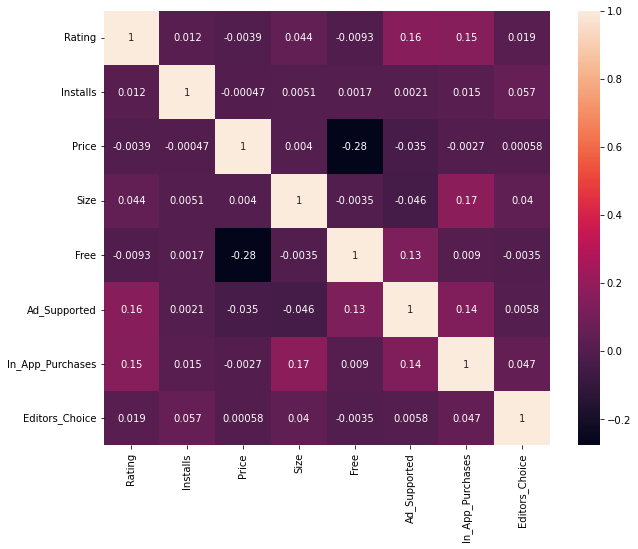

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(playstore.corr(),annot=True)
plt.plot()

## Scaling

In [65]:
Google_Playstore=playstore.copy()

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
def scaling(Google_Playstore):
    try:
        ps_n1 = Google_Playstore.select_dtypes(exclude='object')
        ps_n2 = ps_n1.select_dtypes(exclude='datetime64')
        # update the cols with their normalized values
        Google_Playstore[ps_n2.columns] = sc.fit_transform(ps_n2)

        # convert string variable to One Hot Encoding
        Google_Playstore = pd.get_dummies(Google_Playstore)
    except:
           Google_Playstore 

In [67]:
# method calling

scaling(Google_Playstore)

In [68]:
Google_Playstore

,App_Name,Category,Minimum_Android,Content_Rating,Rating_Range,Rating,Installs,Price,Size,Released,Last_Updated,Free,Ad_Supported,In_App_Purchases,Editors_Choice
0,Gakondo,Adventure,7.1 and up,Everyone,NoRating,-1.031918,-0.012392,-0.039373,-0.366920,2020-02-26,2020-02-26,0.141597,-1.013975,-0.305581,-0.018731
1,Ampere Battery Info,Tools,5.0 and up,Everyone,Less than 10K,1.060990,-0.012041,-0.039373,-0.665384,2020-05-21,2021-05-06,0.141597,0.986217,-0.305581,-0.018731
2,Vibook,Productivity,4.0.3 and up,Everyone,NoRating,-1.031918,-0.012389,-0.039373,-0.631754,2019-08-09,2019-08-19,0.141597,-1.013975,-0.305581,-0.018731
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,4.0.3 and up,Everyone,Less than 10K,1.584217,-0.012392,-0.039373,-0.711624,2018-09-10,2018-10-13,0.141597,0.986217,-0.305581,-0.018731
4,GROW.me,Tools,4.1 and up,Everyone,NoRating,-1.031918,-0.012386,-0.039373,-0.526661,2020-02-21,2018-11-12,0.141597,-1.013975,-0.305581,-0.018731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,Education,4.1 and up,Everyone,Less than 10K,0.537763,-0.012322,-0.039373,-0.366920,2018-05-22,2018-12-14,0.141597,0.986217,-0.305581,-0.018731
2312940,ORU Online,Education,4.1 and up,Everyone,NoRating,-1.031918,-0.012386,-0.039373,1.062343,2018-01-17,2018-02-02,0.141597,-1.013975,-0.305581,-0.018731
2312941,Data Structure,Education,5.0 and up,Everyone,NoRating,-1.031918,-0.012386,-0.039373,0.431786,2018-08-19,2018-08-19,0.141597,-1.013975,-0.305581,-0.018731
2312942,Devi Suktam,Music,5.0 and up,Everyone,Less than 10K,0.537763,-0.012322,-0.039373,-0.366920,2016-08-01,2021-05-05,0.141597,0.986217,-0.305581,-0.018731


In [69]:
Google_Playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235329 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App_Name          object        
 1   Category          object        
 2   Minimum_Android   object        
 3   Content_Rating    object        
 4   Rating_Range      object        
 5   Rating            float64       
 6   Installs          float64       
 7   Price             float64       
 8   Size              float64       
 9   Released          datetime64[ns]
 10  Last_Updated      datetime64[ns]
 11  Free              float64       
 12  Ad_Supported      float64       
 13  In_App_Purchases  float64       
 14  Editors_Choice    float64       
dtypes: datetime64[ns](2), float64(8), object(5)
memory usage: 272.9+ MB


## Data Modelling

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

In [72]:
X = Google_Playstore.drop(['App_Name','Rating','Category','Minimum_Android','Content_Rating','Rating_Range','Released','Last_Updated'],axis=1)
y = Google_Playstore['Rating']

###### Train & Test Data Spliting

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Linear Regression

In [78]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)
print('r2_score of training data',r2_score(model_1.predict(X_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_1.predict(X_test).round(1),y_test))

r2_score of training data -20.256577790806478
r2_score of testing data -20.244618599623006


In [79]:
print('mean absolute error of training data',mean_absolute_error(model_1.predict(X_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_1.predict(X_test).round(1),y_test))

mean absolute error of training data 0.9200305168357363
mean absolute error of testing data 0.9200349225775141


## Decision Tree

In [80]:
model_2=DecisionTreeRegressor(max_depth=9)
model_2.fit(X_train,y_train)
print('r2_score of training data',r2_score(model_2.predict(X_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_2.predict(X_test).round(1),y_test))

r2_score of training data -0.18154454063419578
r2_score of testing data -0.18475594467031708


In [81]:
print('mean absolute error of training data',mean_absolute_error(model_2.predict(X_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_2.predict(X_test).round(1),y_test))

mean absolute error of training data 0.532732021664604
mean absolute error of testing data 0.5335462784085807


## RandomForest

In [82]:
model_3=RandomForestRegressor(max_depth=9)
model_3.fit(X_train,y_train)
print('r2_score of training data',r2_score(model_3.predict(X_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_3.predict(X_test).round(1),y_test))

r2_score of training data -0.17896858831931994
r2_score of testing data -0.1824330454120553


In [83]:
print('mean absolute error of training data',mean_absolute_error(model_3.predict(X_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_3.predict(X_test).round(1),y_test))

mean absolute error of training data 0.532660482801998
mean absolute error of testing data 0.5334812180293311


# XGBRegression

In [87]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
from xgboost import XGBRegressor
model_4=XGBRegressor()
model_4.fit(X_train,y_train)
print('r2_score of training data',r2_score(model_4.predict(X_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_4.predict(X_test).round(1),y_test))

r2_score of training data -0.16761371489129706
r2_score of testing data -0.17237152786680854


In [85]:
print('mean absolute error of training data',mean_absolute_error(model_4.predict(X_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_4.predict(X_test).round(1),y_test))

mean absolute error of training data 0.5323959618826059
mean absolute error of testing data 0.533653683149055
